In [4]:
from biref_forecasts.biref_fisher_class import FisherBiref
from pspy import so_dict
import numpy as np
from math import pi
from copy import deepcopy
from matplotlib import pyplot as plt
import matplotlib as mpl
import random

mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.5

# print(mpl.rcParams.keys())

In [6]:
### Planck
args_1s = so_dict.so_dict()
args_1s.read_from_file('paramfiles/Planck_HFI_args.dict')
args_1s['fsky'] = 0.92
args_1s['amp_dust'] = [6. for _ in args_1s['splits']]
args_1a = deepcopy(args_1s)
args_1a['alphas_mapping'] = [0, 0, 0, 0]

args_2s = so_dict.so_dict()
args_2s.read_from_file('paramfiles/Planck_HFI_args.dict')
args_2s['splits'] = [split+s for split in args_1s['splits'] for s in ['A', 'B']]
args_2s['nu_GHzs'] = [freq for freq in args_1s['nu_GHzs'] for s in ['A', 'B']]
args_2s['Nls_filenames'] = [filename for filename in args_1s['Nls_filenames'] for s in ['A', 'B']]
args_2s['Nls_factor'] = 2
args_2s['fsky'] = 0.92
args_2s['amp_dust'] = [6. for _ in args_2s['splits']]
args_2s2 = deepcopy(args_2s)
args_2s2['alphas_mapping'] = [0, 0, 1, 1, 2, 2, 3, 3]
args_2s1a = deepcopy(args_2s)
args_2s1a['alphas_mapping'] = [0, 0, 0, 0, 0, 0, 0, 0]

args_dict = {
    '1split': args_1s,
    '1angle': args_1a,
    '2split': args_2s,
    # '2split2': args_2s2,
    '2split 1angle': args_2s1a,
}

if False:
    for args in args_dict.values():
        args['nu_GHzs'] = [200 for _ in args['splits']]

In [7]:
fisher_dict = {name: FisherBiref(**args).fisher() for name, args in args_dict.items()}
alpha_bias_dict = {name: FisherBiref(**args).bias()['a'] for name, args in args_dict.items()}
beta_bias_dict = {name: FisherBiref(**args).bias()['b'] for name, args in args_dict.items()}

lb = FisherBiref(**args_1s).ls

fisher_dict['1split eff'] = np.block([[np.sum(fisher_dict['1split'][0, 0]) , np.sum(fisher_dict['1split'][0, 1:])],
                                    [np.sum(fisher_dict['1split'][1:, 0]) , np.sum(fisher_dict['1split'][1:, 1:])]])

# prior = np.zeros_like((5, 5))
# prior_index = 4
# prior[prior_index, prior_index] += 0.1**-2 * ((180 / np.pi)**2)
# np.sqrt(1 / np.sum(np.linalg.inv(cov_mat[1:, 1:])))

cov_dict = {name: np.linalg.inv(fisher_mat) * (180 / np.pi)**2 for name, fisher_mat in fisher_dict.items()}

sigmas_dict = {name: np.sqrt(cov_mat.diagonal()) for name, cov_mat in cov_dict.items()}

sigmas_dict

/Users/duparc/Desktop/Stage_M2/codes/biref_forecasts/functions/foregrounds.py:86: RuntimeWarning: divide by zero encountered in power
  return ((ls / 500) ** (alpha + 2)) / fac


{'1split': array([0.11191861, 0.13603795, 0.10349096, 0.09348904, 0.09157124]),
 '1angle': array([0.10442858, 0.09106942]),
 '2split': array([0.11191861, 0.16188698, 0.16188698, 0.11019645, 0.11019645,
        0.09670336, 0.09670336, 0.09274869, 0.09274869]),
 '2split 1angle': array([0.10442858, 0.09106942]),
 '1split eff': array([0.10442858, 0.09106942])}

In [263]:
colors = {
    '1angle': 'tab:blue',
    '1split': 'tab:orange',
    '2split': 'tab:green',
    '1angle': 'dodgerblue',
    '1split': 'blueviolet',
    '2split': 'red',
    '2split 1angle': 'lightcoral',
    '1split eff': 'tab:blue',
    '2split2': 'gold',
}
zorders = {
    '1angle': 0,
    '1split': 2,
    '2split': 3,
    '2split 1angle': 1,
    '1split eff': 5
}
markers = {
    '1split': 'x',
    '1angle': '1',
    '2split': '+',
    '2split 1angle': '4',
    '2split2': '+',
    '1split eff': '1',
}
markersizes = {
    '1split': 12,
    '1angle': 12,
    '2split': 12,
    '2split 1angle': 12,
    '2split2': '+',
    '1split eff': 12,
}

labels = {
    '1split': r'1map/freq, 1$\alpha$/map',
    '1split eff': r'1map/freq, combined error on $\alpha$',
    '1angle': r'1map/freq, 1$\alpha$',
    '2split': r'2map/freq, 1$\alpha$/map',
    '2split 1angle': r'2map/freq, 1$\alpha$',
    '2split2': r'2map/freq, 1$\alpha/map, combined$',
    '1angle': r'1$\alpha$',
    '1split': r'1$\alpha$ per frequency',
    '2split': r'1$\alpha$ per detector split',
}

linestyles = {
    '1angle': '-',
    '1split eff': ':',
    '2split 1angle': (0, (4, 8)),
    '1angle': (2, (4, 8)),
    '1split': (4, (4, 8)),
    '2split': (6, (4, 8)),
    '2split 1angle': (5, (4, 8)),
    '2split2': (3, (4, 8)),
}


single_angle = ['1split']   # , '2split2'

one_angle = ['1angle', '2split 1angle']   # , '1split eff'

two_angles = ['2split']

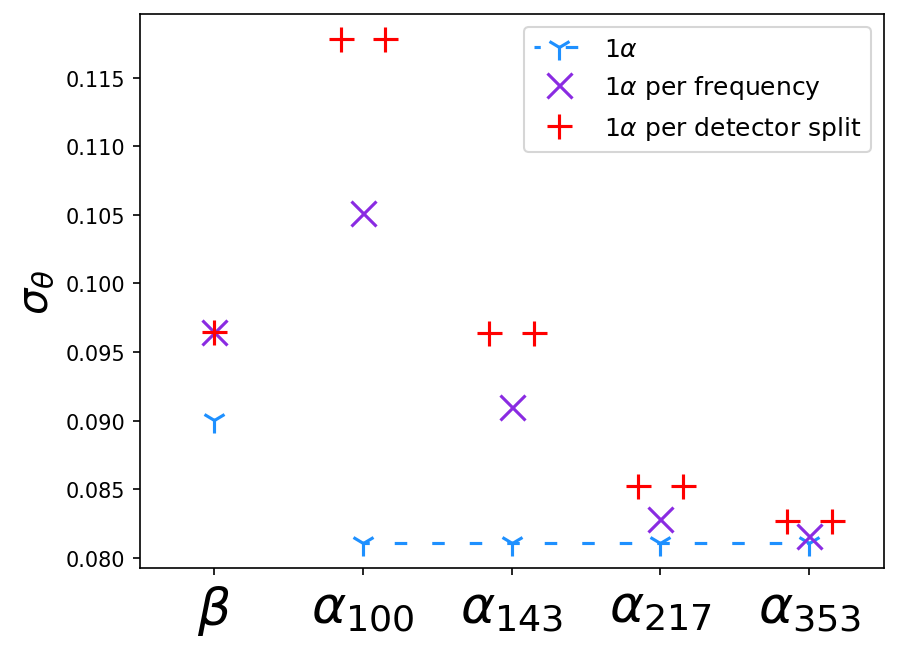

In [265]:
fig, ax = plt.subplots(dpi=150)

two_angles_xs = [0, 0.85, 1.15, 1.85, 2.15, 2.85, 3.15, 3.85, 4.15]

names_to_plot = ['1angle', '1split', '2split']

for zorder_m1, name in enumerate(names_to_plot):
    if name in single_angle:
        ax.plot(sigmas_dict[name], linestyle='', marker=markers[name], color=colors[name], alpha=1, label=labels[name], zorder=zorders[name], markersize=markersizes[name])

    if name in one_angle:
        ax.plot(sigmas_dict[name][0], marker=markers[name], color=colors[name], alpha=1, label=labels[name], zorder=zorders[name], linestyle=linestyles[name], markersize=markersizes[name])
        ax.plot([i+1 for i in range(4)], [sigmas_dict[name][1:] for i in range(4)], color=colors[name], alpha=1, marker=markers[name], markersize=markersizes[name], linestyle=linestyles[name])
    
    if name in two_angles:
        ax.plot(two_angles_xs, sigmas_dict[name], marker=markers[name], color=colors[name], alpha=1, linestyle='', label=labels[name], zorder=zorders[name], markersize=markersizes[name])
        # for angle_index in [0, 1, 2, 3]:
        #     ax.plot(
        #         angle_index+1, 
        #         np.sqrt(1 / np.sum(np.linalg.inv(cov_dict[name][1 + 2*angle_index:1 + 2*angle_index+2, 1 + 2*angle_index:1 + 2*angle_index+2]))),
        #         marker=markers[name],
        #         color=colors[name],
        #         zorder=zorder
        #     )

ax.set_xticks([0, 1, 2, 3, 4], labels=[r'$\beta$', r'$\alpha_{100}$', r'$\alpha_{143}$', r'$\alpha_{217}$', r'$\alpha_{353}$'], fontsize=25)
ax.set_xlim(-0.5, 4.5)
# ax.set_ylim(0, 0.14)

ax.set_ylabel(r'$\sigma_\theta$', fontsize=20)
ax.legend(fontsize=12)

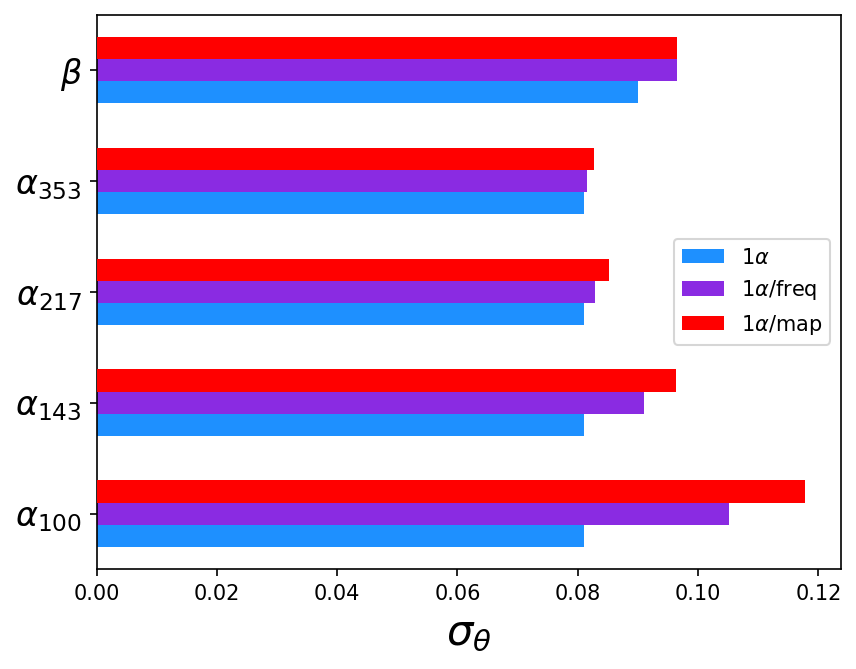

In [248]:
fig, ax = plt.subplots(dpi=150)

two_angles_labels = [r'$\beta$', r'$\alpha_{100}$', r'$\alpha_{143}$', r'$\alpha_{217}$', r'$\alpha_{353}$']
two_angles_ys = [5, 1, 1, 2, 2, 3, 3, 4, 4]  # Replace with category indices if needed

names_to_plot = ['1angle', '1split', '2split']
y_shifts = [-0.2, 0, 0.2]

for zorder_m1, name in enumerate(names_to_plot):
    if name in single_angle:
        ax.barh(
            y=[5 + y_shifts[zorder_m1]], 
            width=sigmas_dict[name][0], 
            color=colors[name], 
            alpha=1, 
            label=labels[name], 
            zorder=zorders[name], 
            height=0.2
        )
        for i in range(4):
            ax.barh(
                y=[i + 1 + y_shifts[zorder_m1]], 
                width=sigmas_dict[name][i + 1], 
                color=colors[name], 
                alpha=1, 
                height=0.2,
                zorder=zorders[name]
            )

    if name in one_angle:
        ax.barh(
            y=[5 + y_shifts[zorder_m1]], 
            width=sigmas_dict[name][0], 
            color=colors[name], 
            alpha=1, 
            label=labels[name], 
            zorder=zorders[name], 
            height=0.2
        )
        for i in range(4):
            ax.barh(
                y=[i + 1 + y_shifts[zorder_m1]], 
                width=sigmas_dict[name][1], 
                color=colors[name], 
                alpha=1, 
                height=0.2,
                zorder=zorders[name]
            )

    if name in two_angles:
        for i, val in enumerate(sigmas_dict[name]):
            if i // 2 == i / 2:
                ax.barh(
                    y=[two_angles_ys[i] + y_shifts[zorder_m1]], 
                    width=val, 
                    color=colors[name], 
                    alpha=1, 
                    label=labels[name] if i == 0 else None,  # only label once
                    zorder=zorders[name], 
                    height=0.2
                )

# Set Y ticks and labels
ax.set_yticks([5, 1, 2, 3, 4], labels=two_angles_labels, fontsize=16)
ax.set_ylim(0.5, 5.5)

# Axis labels
ax.set_xlabel(r'$\sigma_\theta$', fontsize=20)
ax.legend()

In [226]:
for name, sigma in sigmas_dict.items():
    print(name, [f'{s:.4f}' for s in sigma])

1split ['0.0964', '0.1051', '0.0910', '0.0828', '0.0816']
1angle ['0.0900', '0.0811']
2split ['0.0964', '0.1178', '0.1178', '0.0964', '0.0964', '0.0852', '0.0852', '0.0827', '0.0827']
2split 1angle ['0.0900', '0.0811']
1split eff ['0.0900', '0.0811']


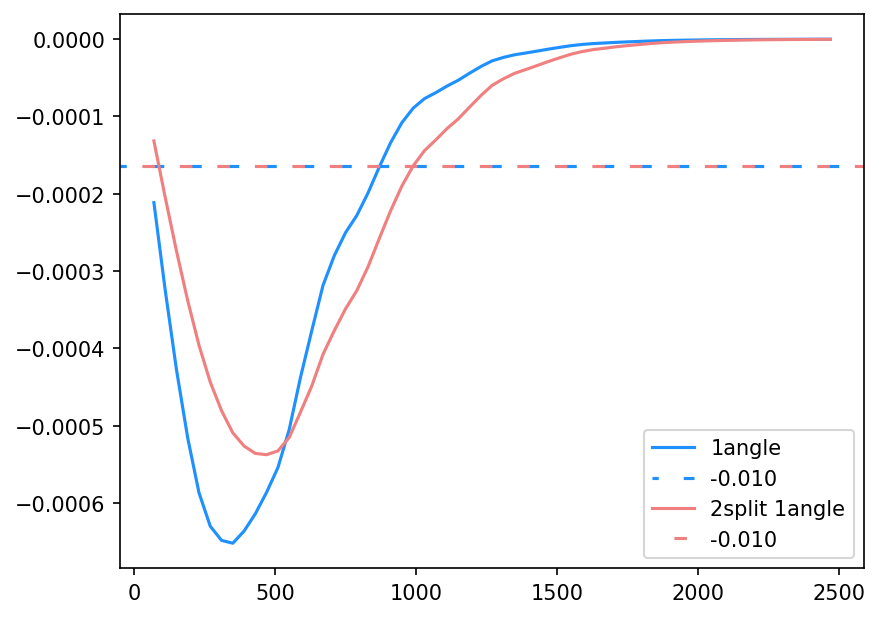

In [227]:
fig, ax = plt.subplots(dpi=150)

for name in ['1angle', '2split 1angle']:
    ax.plot(lb, beta_bias_dict[name], label=name, alpha=1, color=colors[name])
    ax.axhline(np.mean(beta_bias_dict[name]), label=f'{np.sum(beta_bias_dict[name]):.3f}', alpha=1, linestyle=linestyles[name], color=colors[name])
# for name, alpha_bias in alpha_bias_dict.items():
#     plt.plot(alpha_bias, label=name)

ax.legend()